In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolov3files/car.jpg
/kaggle/input/yolov3files/all3.jfif
/kaggle/input/yolov3files/cats and dogs.jfif
/kaggle/input/yolov3files/yolov3-spp.weights
/kaggle/input/yolov3files/yolov3-spp.cfg
/kaggle/input/yolov3files/coco.names


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
yolomodel = cv2.dnn.readNet("../input/yolov3files/yolov3-spp.weights", "../input/yolov3files/yolov3-spp.cfg")

In [17]:
classes = []
with open('../input/yolov3files/coco.names', 'r') as f:
    classes = f.read().splitlines()

In [18]:
len(classes)

80

In [19]:
img = cv2.imread('../input/yolov3files/car.jpg')
img = cv2.resize(img, (320, 320), interpolation=cv2.INTER_AREA)
height, width, channel = img.shape

In [20]:
blob = cv2.dnn.blobFromImage(img, 1/255,(320, 320),(0,0,0),swapRB=True, crop = False)

In [21]:
blob.shape

(1, 3, 320, 320)

In [22]:
yolomodel.setInput(blob)
output_layers_names = yolomodel.getUnconnectedOutLayersNames()
layer_Output = yolomodel.forward(output_layers_names)

In [23]:
boxes = []
confidances = []
class_IDs = []

for output in layer_Output:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidance = score[class_id]
        if confidance > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            x = int(center_x - w/2)
            y = int(center_x - h/2)
            
            boxes.append([x,y,w,h])
            confidances.append(float(confidance))
            class_IDs.append(class_id)

In [24]:
len(boxes)

2

In [25]:
indexes = cv2.dnn.NMSBoxes(boxes, confidances, 0.5, 0.4)
print(indexes)

[[1]
 [0]]


In [26]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(classes),3))
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_IDs[i]])
    confi = str(round(confidances[i],2))
    color = colors[i]
    
    cv2.rectangle(img,(x,y),(x+w, y+h), color, 1)
    cv2.putText(img, (label + "-" + confi),(x, y+10),font, 2, (180,255,180), 2) 

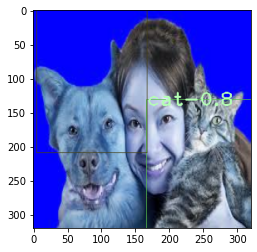

In [27]:
plt.imshow(img)